In [22]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.insert(1,'./../../../sfmbv')


import methods
import matplotlib.pyplot as plt
import networkx as nx
import scipy
import numpy as np
import betterspy

import qtree_methods as qtm

from sklearn.cluster import KMeans

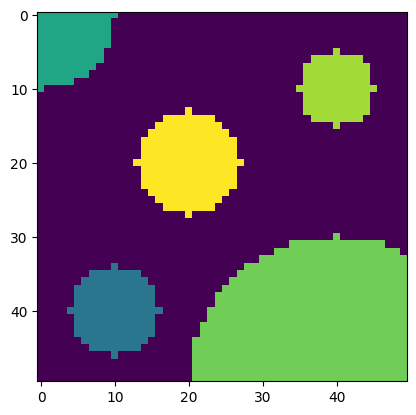

In [23]:
img_array, sh = methods.dots_2d(noise=0)
mask_array = None

plt.imshow(img_array)

In [24]:
wf = methods.WeightKernel(
    dist_sig = 1,
    intensity_sig = 100
)

# problem with mask?
G = methods.ImageGraph(
    img_array, 
    mask_array=mask_array, 
    wf=wf, 
    neighbour_depth = 1, 
    cmap='viridis'
    )


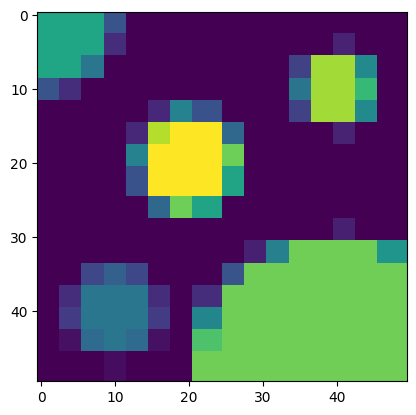

In [25]:
qtree = qtm.QTree2(img_array, min_depth = 4, max_depth = 4, std_delta=6)
plt.imshow(qtree.cimg_array)


In [26]:
# define partition
nodes_list = list((G.nodes))
partition_list = []
for i in range(len(nodes_list)):
    curr_coords = G.v_coords[nodes_list[i]]
    partition_list.append(qtree.leaf_inc[*curr_coords])

# nodes_list
# partition_list

In [27]:
CG = methods.CoarseGraph(G, nodes_list, partition_list)

0.0
0.00390625
0.0078125
0.01171875
0.015625
0.01953125
0.0234375
0.02734375
0.03125
0.03515625
0.0390625
0.04296875
0.046875
0.05078125
0.0546875
0.05859375
0.0625
0.06640625
0.0703125
0.07421875
0.078125
0.08203125
0.0859375
0.08984375
0.09375
0.09765625
0.1015625
0.10546875
0.109375
0.11328125
0.1171875
0.12109375
0.125
0.12890625
0.1328125
0.13671875
0.140625
0.14453125
0.1484375
0.15234375
0.15625
0.16015625
0.1640625
0.16796875
0.171875
0.17578125
0.1796875
0.18359375
0.1875
0.19140625
0.1953125
0.19921875
0.203125
0.20703125
0.2109375
0.21484375
0.21875
0.22265625
0.2265625
0.23046875
0.234375
0.23828125
0.2421875
0.24609375
0.25
0.25390625
0.2578125
0.26171875
0.265625
0.26953125
0.2734375
0.27734375
0.28125
0.28515625
0.2890625
0.29296875
0.296875
0.30078125
0.3046875
0.30859375
0.3125
0.31640625
0.3203125
0.32421875
0.328125
0.33203125
0.3359375
0.33984375
0.34375
0.34765625
0.3515625
0.35546875
0.359375
0.36328125
0.3671875
0.37109375
0.375
0.37890625
0.3828125
0.38671875
0.

In [28]:
# list(CG.nodes)
CG._set_node_colour(qtree)

In [29]:
# bins = np.linspace(0, 255, 256, dtype=int)
# scale_v = np.digitize(qtree.cimg_array, bins) / 255 

# map = plt.get_cmap('viridis')

# for i in list(CG.nodes):
#     curr_v = scale_v[*self.v_coords[i]]
#     r, g, b, a = map(curr_v)
#     CG.nodes[i]['viz'] = {'color': {'r': np.int(255*r), 'g': np.int(255*g), 'b': np.int(255*b), 'a': np.int(1*a)}} # a <-> 1?

In [30]:
nx.write_gexf(CG,'coarse_01.gexf')

In [31]:
P = nx.normalized_laplacian_matrix(CG)

In [32]:
vals, vecs = scipy.sparse.linalg.eigs(P, which='SR')

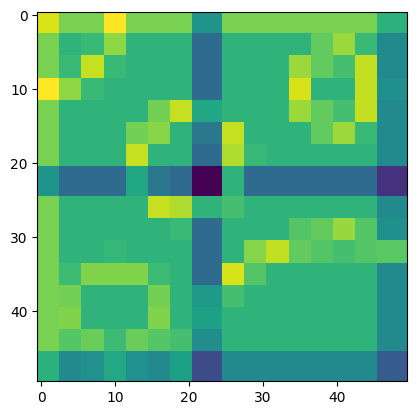

In [33]:
v = np.real(vecs[:,0])
v_img = qtm.leaf_vec_to_img(qtree, v)
plt.imshow(v_img)

In [34]:
cluster_num = 5

kmeans = KMeans(n_clusters=cluster_num, random_state=0, n_init="auto").fit(np.real(vecs))
labels = kmeans.labels_+1

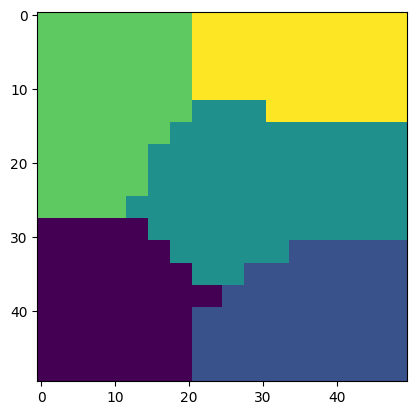

In [35]:
k_img = qtm.leaf_vec_to_img(qtree, labels)
plt.imshow(k_img)

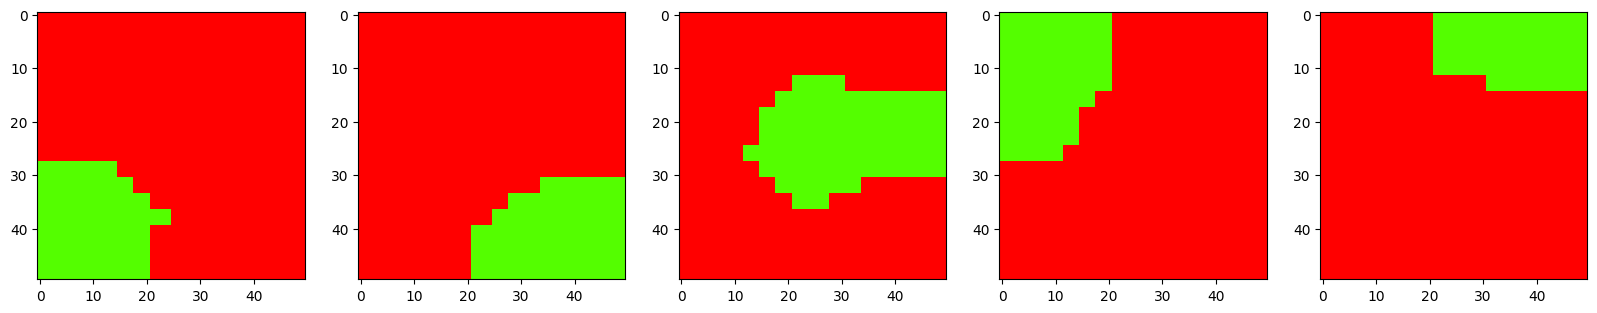

In [36]:
fig, axs = plt.subplots(1, cluster_num) 
fig.set_figheight(4)
fig.set_figwidth(20)

for i in range(1,cluster_num+1):
    curr = k_img == i
    axs[i-1].imshow(curr, cmap='prism')

In [37]:
T = methods.transition_matrix(G)
T = scipy.sparse.csr_matrix(T)

In [38]:
img0 = np.zeros(img_array.shape)
img0[20,15] = 1

In [39]:
vec0 = G._img_array_to_node_vec(img0)

In [40]:
trans = T.__pow__(100)
# plt.spy(trans)

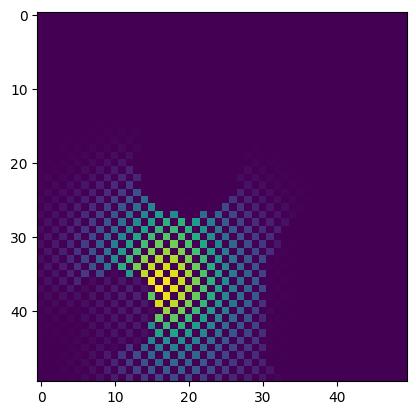

In [41]:
plt.imshow(G._node_vec_to_img_array(trans.dot(vec0)))